# Cosine Similarity 

## Code Part 

In [27]:
sentence_1 = "The weather looks quite sunny today."
sentence_2 = "The weather is always sunny these days." 
sentence_3 = "The weather wasn't very sunny yesterday."

- First, we need to create a vector for each sentence and create word list in the three sentences. 
- To do this, creating a simple function that will tokenize the sentences by stripping them of any punctuation. 

In [29]:
import re
import string

def tokenizer(text):
    # Remove punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])

    # Convert to lowercase to treat words like 'The' and 'the' as the same
    text_lower = text_nopunct.lower()

    # Split the text on one or more whitespace characters
    tokens = re.split(r'\s+', text_lower.strip())
    
    # Filter out any empty strings that might result from splitting
    tokens = [token for token in tokens if token]
    
    return tokens

word_list = list(set(tokenizer(sentence_1) + 
                     tokenizer(sentence_2) + 
                     tokenizer(sentence_3)))

print(word_list)

['sunny', 'these', 'looks', 'yesterday', 'wasnt', 'weather', 'is', 'always', 'quite', 'the', 'days', 'very', 'today']


- In the next step, create a function that will assign a value of 1 to the vector of each sentence if it contains the words in the word list, and 0 otherwise. 

In [30]:
import numpy as np 
vector_1 = [0]*len(word_list)
vector_2 = [0]*len(word_list)
vector_3 = [0]*len(word_list)

def vectors(word_list, sentence, vector):
    for j in tokenizer(sentence):
        for i in range(0, len(word_list)):
            if j == word_list[i]:
                vector[i] = 1
    vector = np.array(vector)
    return vector

vector_1 = vectors(word_list, sentence_1, vector_1)
vector_2 = vectors(word_list, sentence_2, vector_2)
vector_3 = vectors(word_list, sentence_3, vector_3)

print("vector_1:", vector_1)
print("vector_2:", vector_2)
print("vector_3:", vector_3)

vector_1: [1 0 1 0 0 1 0 0 1 1 0 0 1]
vector_2: [1 1 0 0 0 1 1 1 0 1 1 0 0]
vector_3: [1 0 0 1 1 1 0 0 0 1 0 1 0]


- 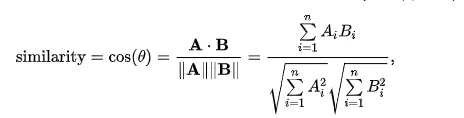

In [38]:
def cos_sim(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_1 = np.linalg.norm(vector1)
    norm_2 = np.linalg.norm(vector2)
    return dot_product / (norm_1 * norm_2)

print("Cosine similarity between sentence_1 and sentence_2: ", cos_sim(vector_1, vector_2))
print("Cosine similarity between sentence_1 and sentence_3 :", cos_sim(vector_1, vector_3))
print("Cosine similarity between sentence_2 and sentence_3 :", cos_sim(vector_2, vector_3))

Cosine similarity between sentence_1 and sentence_2:  0.4629100498862757
Cosine similarity between sentence_1 and sentence_3 : 0.5000000000000001
Cosine similarity between sentence_2 and sentence_3 : 0.4629100498862757


- Let's make with Scikit-Learn:

In [42]:
documents = [
    "The weather looks quite sunny today.",
    "The weather is always sunny these days.",
    "The weather wasn't very sunny yesterday."
]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd 

count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vectorizer.get_feature_names_out(),
                  index=['vector_1', 'vector_2', 'vector_3'])

df

,always,days,is,looks,quite,sunny,the,these,today,very,wasn,weather,yesterday
vector_1,0,0,0,1,1,1,1,0,1,0,0,1,0
vector_2,1,1,1,0,0,1,1,1,0,0,0,1,0
vector_3,0,0,0,0,0,1,1,0,0,1,1,1,1


In [44]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(df, df)
np.fill_diagonal(cosine, 0)
cosine

array([[0.        , 0.46291005, 0.5       ],
       [0.46291005, 0.        , 0.46291005],
       [0.5       , 0.46291005, 0.        ]])